In [1]:
#Autoreload to be able to tweak source code in the fly without restarting kernel
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
import aligater as ag

In [4]:
fcsList=ag.collectFiles("/media/ludvig/Project_Storage/GAIM/data/GAIM_fcs/", lFilter=["B cell"])

Collected 3022 files, 6347 files did not pass filter(s) and mask(s).

In [5]:
fcsDF = ag.loadFCS(fcsList[5], compensate=True)

Loaded dataset with 500000 events.
Marker labels: IgA CD27 CD34 CD19 IgD CD45 CD38 CD24 

Lets remove those stacked values along the far right edge

494895


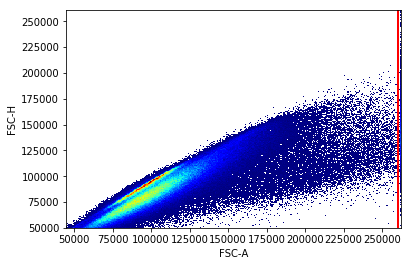

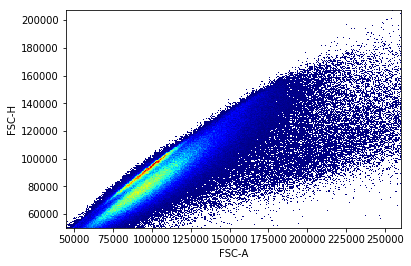

After gating, 494895 out of 500000 events remain.

In [6]:
no_clutter=ag.gateThreshold(fcsDF,"FSC-A", "FSC-H",thresh=260000, orientation='horisontal',population="lower", plot=True)

After gating, 475169 out of 494895 events remain.

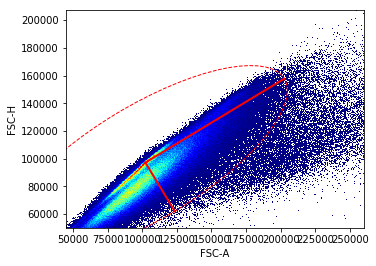

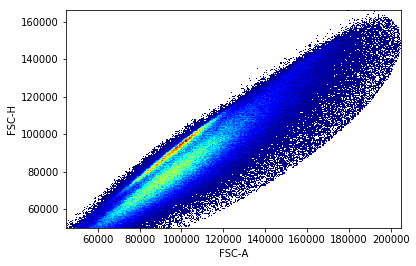

In [7]:
singlets=ag.gatePC(fcsDF,"FSC-A", "FSC-H",center='density',widthScale=3, heightScale=4, vI=no_clutter, plot=True)

144824


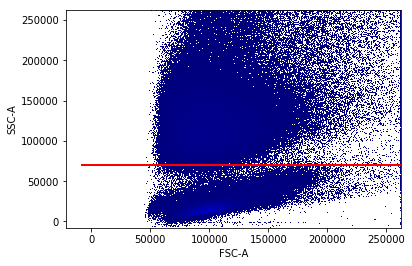

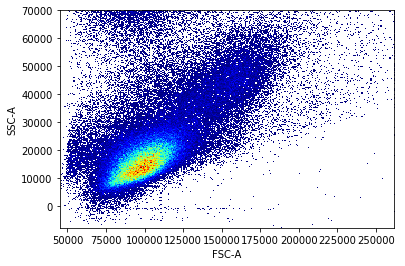

After gating, 144824 out of 500000 events remain.

In [8]:
PBMCstep1=ag.gateThreshold(fcsDF,xCol="FSC-A",yCol="SSC-A",orientation="vertical",thresh=70000,population="lower")

After gating, 134230 out of 144824 events remain.

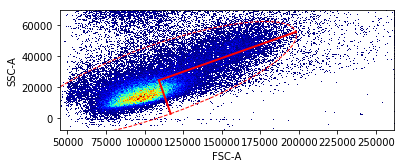

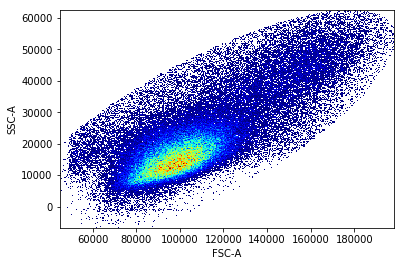

In [9]:
PBMC=ag.gatePC(fcsDF,"FSC-A","SSC-A",center='centroid',widthScale=3, heightScale=2, vI=PBMCstep1, plot=True)

In [10]:
gmm=ag.gmm2D(fcsDF, "FSC-A","SSC-A",vI=PBMCstep1,nOfComponents=1)

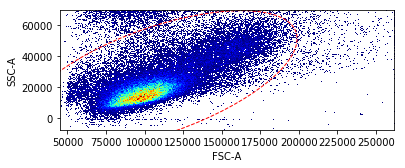

After gating, 138603 out of 144824 events remain.

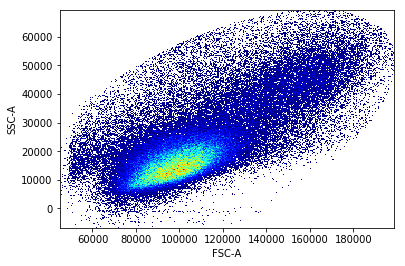

In [11]:
PBMC_gmm_gated=ag.gateGMM(fcsDF, "FSC-A","SSC-A", gmm=gmm,vI=PBMCstep1,sigma=6)

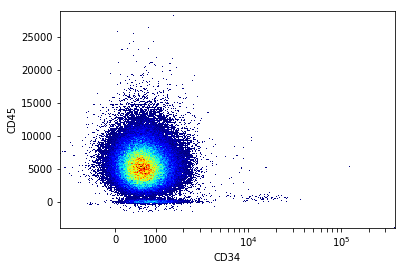

In [67]:
fig, ax = ag.plotHeatmap(fcsDF, "CD34","CD45",PBMC,xscale='logish',bins=300)